In [1]:
# Import libraries for handling data
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt 
from sklearn import preprocessing 
from sklearn.impute import SimpleImputer
from sklearn.model_selection import cross_val_score
from sklearn import linear_model, svm
from sklearn.ensemble import GradientBoostingRegressor as xgb 
from sklearn.metrics import confusion_matrix,accuracy_score,f1_score
from scipy import stats 
import seaborn as sns

%matplotlib inline

## Import Data

In [22]:
train_df = "resources/train.csv"
train_df = pd.read_csv(train_df, index_col=[0])
train_df.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
Id,,,,,,,,,,,,,,,,,,,,,
1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [23]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1460 entries, 1 to 1460
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1460 non-null   int64  
 1   MSZoning       1460 non-null   object 
 2   LotFrontage    1201 non-null   float64
 3   LotArea        1460 non-null   int64  
 4   Street         1460 non-null   object 
 5   Alley          91 non-null     object 
 6   LotShape       1460 non-null   object 
 7   LandContour    1460 non-null   object 
 8   Utilities      1460 non-null   object 
 9   LotConfig      1460 non-null   object 
 10  LandSlope      1460 non-null   object 
 11  Neighborhood   1460 non-null   object 
 12  Condition1     1460 non-null   object 
 13  Condition2     1460 non-null   object 
 14  BldgType       1460 non-null   object 
 15  HouseStyle     1460 non-null   object 
 16  OverallQual    1460 non-null   int64  
 17  OverallCond    1460 non-null   int64  
 18  YearBuil

# Missing Values

In [24]:
# need at least 50% non-NA values (columns with more than these will be dropped)
percent_missing = (100*(train_df.isnull().sum())/train_df.shape[0]).round(1) 
percent_missing.sort_values(ascending = False).head(20)

PoolQC          99.5
MiscFeature     96.3
Alley           93.8
Fence           80.8
FireplaceQu     47.3
LotFrontage     17.7
GarageType       5.5
GarageCond       5.5
GarageFinish     5.5
GarageQual       5.5
GarageYrBlt      5.5
BsmtFinType2     2.6
BsmtExposure     2.6
BsmtQual         2.5
BsmtCond         2.5
BsmtFinType1     2.5
MasVnrArea       0.5
MasVnrType       0.5
Electrical       0.1
RoofMatl         0.0
dtype: float64

In [25]:
# drop column PoolQC, MiscFeature, Alley, Fence, FireplaceQu 
train_df = train_df.drop(['Alley', 'FireplaceQu', 'PoolQC', 'Fence', 'MiscFeature'], axis='columns')
train_df.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
Id,,,,,,,,,,,,,,,,,,,,,
1,60,RL,65.0,8450,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,2,2008,WD,Normal,208500
2,20,RL,80.0,9600,Pave,Reg,Lvl,AllPub,FR2,Gtl,...,0,0,0,0,0,5,2007,WD,Normal,181500
3,60,RL,68.0,11250,Pave,IR1,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,9,2008,WD,Normal,223500
4,70,RL,60.0,9550,Pave,IR1,Lvl,AllPub,Corner,Gtl,...,272,0,0,0,0,2,2006,WD,Abnorml,140000
5,60,RL,84.0,14260,Pave,IR1,Lvl,AllPub,FR2,Gtl,...,0,0,0,0,0,12,2008,WD,Normal,250000


# Categorical Values

In [26]:
#replace 'NA' to value 0
train_df['LotFrontage'] = train_df['LotFrontage'].replace(['NA'], 0)
train_df['MasVnrArea'] = train_df['MasVnrArea'].replace(['NA'], 0)
train_df

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
Id,,,,,,,,,,,,,,,,,,,,,
1,60,RL,65.0,8450,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,2,2008,WD,Normal,208500
2,20,RL,80.0,9600,Pave,Reg,Lvl,AllPub,FR2,Gtl,...,0,0,0,0,0,5,2007,WD,Normal,181500
3,60,RL,68.0,11250,Pave,IR1,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,9,2008,WD,Normal,223500
4,70,RL,60.0,9550,Pave,IR1,Lvl,AllPub,Corner,Gtl,...,272,0,0,0,0,2,2006,WD,Abnorml,140000
5,60,RL,84.0,14260,Pave,IR1,Lvl,AllPub,FR2,Gtl,...,0,0,0,0,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1456,60,RL,62.0,7917,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,8,2007,WD,Normal,175000
1457,20,RL,85.0,13175,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,2,2010,WD,Normal,210000
1458,70,RL,66.0,9042,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,2500,5,2010,WD,Normal,266500


replacing the missing values with an estimate, then analyzing the full data set as if the imputed values were actual observed values.

In [27]:
# imputing missing values with mean
from sklearn.impute import SimpleImputer
Noncat = ['LotFrontage','MasVnrArea']
imp = SimpleImputer(missing_values=np.nan, strategy='mean', copy = False)
imp.fit(train_df[Noncat])

# converting categorical variables to dummy variables encoded with 0,1....
train= pd.get_dummies(data=train_df) 
train

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
Id,,,,,,,,,,,,,,,,,,,,,
1,60,65.0,8450,7,5,2003,2003,196.0,706,0,...,0,0,0,1,0,0,0,0,1,0
2,20,80.0,9600,6,8,1976,1976,0.0,978,0,...,0,0,0,1,0,0,0,0,1,0
3,60,68.0,11250,7,5,2001,2002,162.0,486,0,...,0,0,0,1,0,0,0,0,1,0
4,70,60.0,9550,7,5,1915,1970,0.0,216,0,...,0,0,0,1,1,0,0,0,0,0
5,60,84.0,14260,8,5,2000,2000,350.0,655,0,...,0,0,0,1,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1456,60,62.0,7917,6,5,1999,2000,0.0,0,0,...,0,0,0,1,0,0,0,0,1,0
1457,20,85.0,13175,6,6,1978,1988,119.0,790,163,...,0,0,0,1,0,0,0,0,1,0
1458,70,66.0,9042,7,9,1941,2006,0.0,275,0,...,0,0,0,1,0,0,0,0,1,0


In [28]:
#array of correlation values for each variable vs. SalePrice 
corr1 = train.corr()['SalePrice'] 
corr =corr1[np.abs(corr1) > 0.5]  # just return correlation values greater than abs(0.5)
corr = pd.DataFrame(data=corr,columns= ['SalePrice'])
corr = corr.drop_duplicates().sort_values('SalePrice',ascending =False)
corr

,SalePrice
SalePrice,1.000000
OverallQual,0.790982
GrLivArea,0.708624
GarageCars,0.640409
GarageArea,0.623431
TotalBsmtSF,0.613581
1stFlrSF,0.605852
FullBath,0.560664
BsmtQual_Ex,0.553105
TotRmsAbvGrd,0.533723


In [29]:
train_df.columns

Index(['MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope',
       'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle',
       'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle',
       'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea',
       'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond',
       'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating', 'HeatingQC',
       'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd',
       'Functional', 'Fireplaces', 'GarageType', 'GarageYrBlt', 'GarageFinish',
       'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond', 'PavedDrive',
       'WoodDeckSF', 'OpenPorchSF'

In [30]:
# Change quality categorical data to numerical (eg. 0-5)
qual = {'Po': 1, 'Fa': 2, 'TA': 3, 'Gd': 4, 'Ex': 5}

train_df['ExterQual'] = [qual[x] if x is not np.nan else 1 for x in train_df['ExterQual']]
train_df['KitchenQual'] = [qual[x] if x is not np.nan else 1 for x in train_df['KitchenQual']]

In [31]:
# rename columns
train = train_df.rename({'OverallQual':'House Material Quality',
                      'GrLivArea': 'Living Area',
                      'GarageCars': 'Garage Capacity',
                      'GarageArea': 'Garage Size SF', 
                      'TotalBsmtSF': 'Total Bsmt Area SF',
                      '1stFlrSF': '1st Flr Area SF',
                      'FullBath': 'Number of Full Bathroom',
                      'TotRmsAbvGrd': 'Total Number of Rooms',
                      'YearBuilt' : 'Year Built',
                      'KitchenQual': 'Kitchen Quality',
                      'ExterQual': 'External Quality',
                      'SalePrice': 'Sale Price'}, axis=1)

In [32]:
train.columns

Index(['MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope',
       'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle',
       'House Material Quality', 'OverallCond', 'Year Built', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'External Quality', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'Total Bsmt Area SF',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', '1st Flr Area SF',
       '2ndFlrSF', 'LowQualFinSF', 'Living Area', 'BsmtFullBath',
       'BsmtHalfBath', 'Number of Full Bathroom', 'HalfBath', 'BedroomAbvGr',
       'KitchenAbvGr', 'Kitchen Quality', 'Total Number of Rooms',
       'Functional', 'Fireplaces', 'GarageType', 'GarageYrBlt', 'GarageFinish',
       'Garage Capacity', 'Garage Size SF

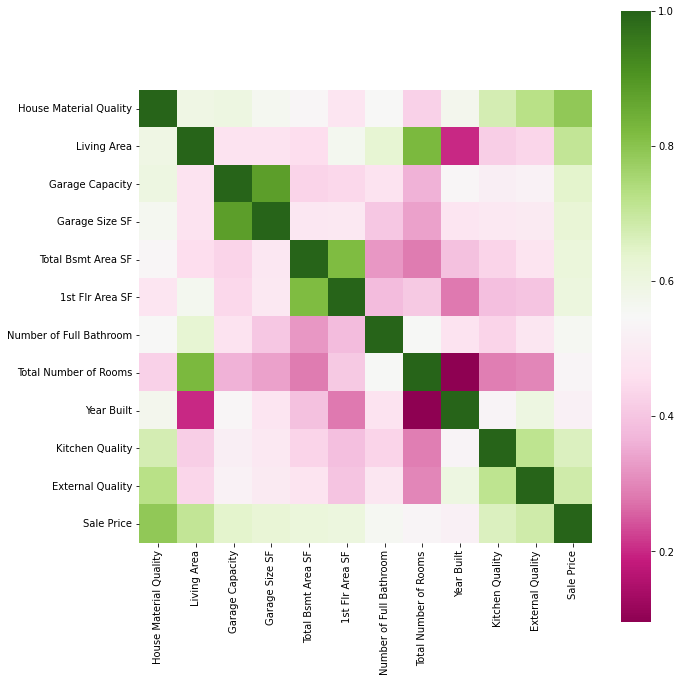

In [33]:
corr_var = ['House Material Quality','Living Area', 'Garage Capacity', 'Garage Size SF','Total Bsmt Area SF', '1st Flr Area SF', 'Number of Full Bathroom', 'Total Number of Rooms', 'Year Built', 'Kitchen Quality', 'External Quality','Sale Price']
train = train[corr_var]
#train
corr_matrix = train.corr()
plt.figure(figsize=(10, 10))
sns.heatmap(corr_matrix, vmax=1,square=True, cmap="PiYG")
plt.tight_layout()
# plt.savefig('corr_matrix.png')

Here GarageArea, TotalRmsAbvGrd, 1stFlrSF, KitchenQual, ExternalQual were dropped because they correlated less with sales price compare to the other variables they correlated with

In [35]:
labels_to_drop = ['Kitchen Quality','External Quality']
train = train.drop(labels_to_drop, axis=1)
train.head(10)

,House Material Quality,Living Area,Garage Capacity,Garage Size SF,Total Bsmt Area SF,1st Flr Area SF,Number of Full Bathroom,Total Number of Rooms,Year Built,Sale Price
Id,,,,,,,,,,
1,7,1710,2,548,856,856,2,8,2003,208500
2,6,1262,2,460,1262,1262,2,6,1976,181500
3,7,1786,2,608,920,920,2,6,2001,223500
4,7,1717,3,642,756,961,1,7,1915,140000
5,8,2198,3,836,1145,1145,2,9,2000,250000
6,5,1362,2,480,796,796,1,5,1993,143000
7,8,1694,2,636,1686,1694,2,7,2004,307000
8,7,2090,2,484,1107,1107,2,7,1973,200000
9,7,1774,2,468,952,1022,2,8,1931,129900


# OUTLIER DETECTIONS

Here I will use scatter plots for the continous variables and boxplots for the categorical variables. We can use certain rules of thumb like: Any value, which is beyond the range of -1.5 x IQR to 1.5 x IQR Data points, three or more standard deviation away from mean If a few isolated points lie outside the general trend line, then they can be deleted.

Text(0.5, 1.0, 'Sale Price vs Garage Capacity')

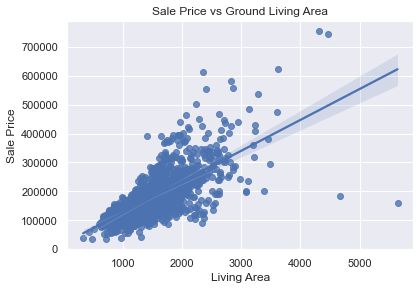

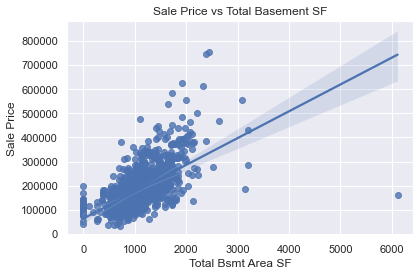

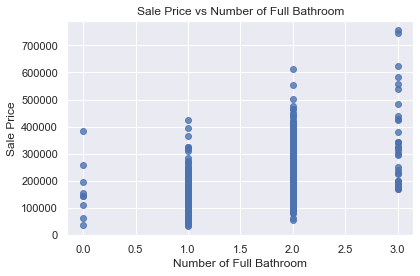

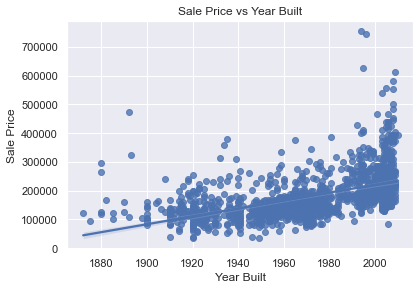

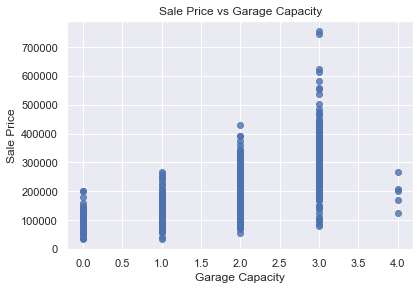

In [36]:
plt.figure(1)
sns.set(color_codes=True)
ax = sns.regplot(x="Living Area", y="Sale Price", data=train)
plt.tight_layout()
plt.title('Sale Price vs Ground Living Area')
#plt.savefig('SalePricevsGroundLivingArea.png')

plt.figure(2)
sns.set(color_codes=True)
ax = sns.regplot(x="Total Bsmt Area SF", y="Sale Price", data=train)
plt.title('Sale Price vs Total Basement SF')
plt.tight_layout()
#plt.savefig('SalePricevsTotalBasementSF.png')

plt.figure(3)
sns.set(color_codes=True)
ax = sns.regplot(x="Number of Full Bathroom", y="Sale Price", data=train, fit_reg = False)
plt.title('Sale Price vs Number of Full Bathroom')
plt.tight_layout()
#plt.savefig('SalePricevsNumberofFullBathroom.png')

plt.figure(4)
sns.set(color_codes=True)
ax = sns.regplot(x="Year Built", y="Sale Price", data=train)
plt.tight_layout()
plt.title('Sale Price vs Year Built')
#plt.savefig('SalePricevsYearBuilt.png')

plt.figure(5)
sns.set(color_codes=True)
ax = sns.regplot(x="Garage Capacity", y="Sale Price", data=train, fit_reg = False)
plt.tight_layout()
plt.title('Sale Price vs Garage Capacity')
#plt.savefig('SalePricevsGarageCapacity.png')

Four outliers in the graphs above will be dropped. These corresponding to ground living area > 4500 and sales price between 700000 and 800000 in Year Built graph.The isolated TotalBsmtSF point > 6000 is also included as part of these outliers which will be removed.

In [37]:
train = train.rename({'Living Area': 'GrLivArea', 'Sale Price': 'SalePrice'}, axis=1)

In [38]:
train =train.drop(train[train.GrLivArea == 5642].index)
train =train.drop(train[train.GrLivArea == 4476].index)
train =train.drop(train[train.SalePrice == 755000].index)
train =train.drop(train[train.SalePrice == 745000].index)

In [39]:
train = train.rename({'GrLivArea': 'Living Area', 'SalePrice': 'Sale Price'}, axis=1)

# Normality and linearity

C:\Users\esalg\anaconda3\envs\pythondata\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


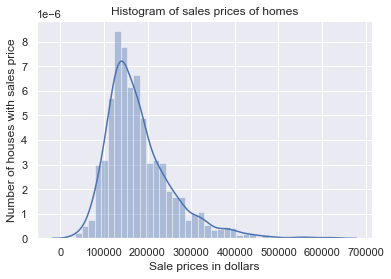

C:\Users\esalg\anaconda3\envs\pythondata\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


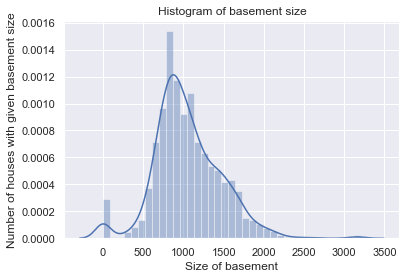

C:\Users\esalg\anaconda3\envs\pythondata\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


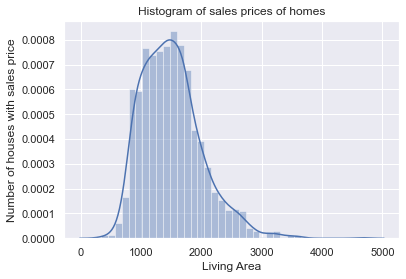

In [40]:
plt.figure(1)
sns.distplot(train['Sale Price'])
plt.xlabel("Sale prices in dollars")
plt.ylabel("Number of houses with sales price") 
plt.title("Histogram of sales prices of homes")
plt.grid(True) 
plt.show()
#plt.savefig('Histogramofsalespricesofhomes.png')


plt.figure(2)
sns.distplot(train['Total Bsmt Area SF'])
plt.xlabel("Size of basement")
plt.ylabel("Number of houses with given basement size") 
plt.title("Histogram of basement size")
plt.grid(True) 
plt.show()
#plt.savefig('Histogramofbasementsize.png')

plt.figure(3)
sns.distplot(train['Living Area'])
plt.xlabel("Living Area")
plt.ylabel("Number of houses with sales price") 
plt.title("Histogram of sales prices of homes")
plt.grid(True) 
plt.show()
#plt.savefig('Histogramofsalespricesofhomes.png')

C:\Users\esalg\anaconda3\envs\pythondata\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


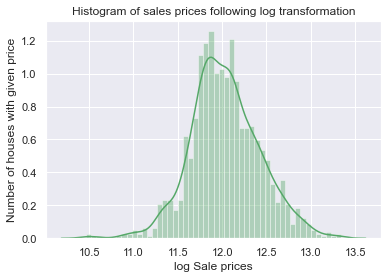

C:\Users\esalg\anaconda3\envs\pythondata\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


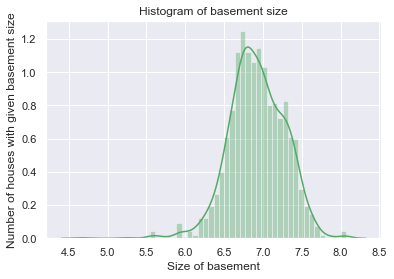

C:\Users\esalg\anaconda3\envs\pythondata\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


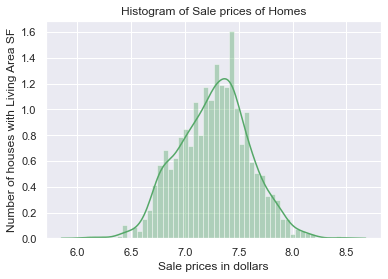

In [41]:
# Removing zero values in TotalBsmtSF to perform log transormation afterwards 
train_new = train.drop(train[train['Total Bsmt Area SF']==0].index, axis =0)

train_new.loc[:,['Sale Price','Total Bsmt Area SF','Living Area','Year Built']] = np.log(train_new[['Sale Price','Total Bsmt Area SF','Living Area','Year Built']])
plt.figure(1)
sns.distplot(train_new['Sale Price'], 50, color = "g")
plt.xlabel("log Sale prices")
plt.ylabel("Number of houses with given price") 
plt.title("Histogram of sales prices following log transformation")
plt.grid(True) 
plt.show()

plt.figure(2)
sns.distplot(train_new['Total Bsmt Area SF'], 50, color ="g")
plt.xlabel("Size of basement")
plt.ylabel("Number of houses with given basement size") 
plt.title("Histogram of basement size")
plt.grid(True) 
plt.show()
#plt.savefig('HistogramofbasementsizeTransform.png')

plt.figure(3)
sns.distplot(train_new['Living Area'], 50, color ="g")
plt.xlabel("Sale prices in dollars")
plt.ylabel("Number of houses with Living Area SF") 
plt.title("Histogram of Sale prices of Homes")
plt.grid(True) 
plt.show()
#plt.savefig('HistogramofSalepricesof HomesTransform.png')

The distrbutions are now centered and more normally distributed and less skewed.

Text(0.5, 1.0, 'Log Sale Price vs Log Total Basement size')

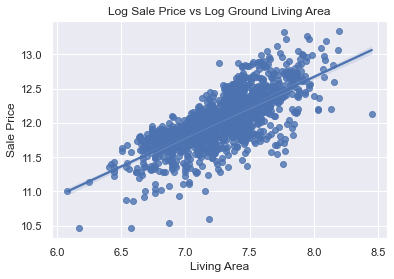

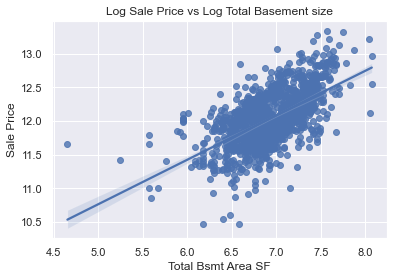

In [42]:
plt.figure()
sns.set(color_codes=True)
ax = sns.regplot(x="Living Area", y="Sale Price", data=train_new)
plt.title('Log Sale Price vs Log Ground Living Area')

plt.figure()
sns.set(color_codes=True)
ax = sns.regplot(x="Total Bsmt Area SF", y="Sale Price", data=train_new)
plt.title('Log Sale Price vs Log Total Basement size')